### 3. Final project - preliminary analysis

Make an exploratory plot using the data that you plan to work with in your final project. The submission format is open-ended. You can upload your analysis as a notebook, or upload an image to this repository. The goal is to start working with your own data (or publicly available data relevant to your research interests) in Python.

The full project assignment, with timeline, can be found at https://github.com/mlmldata24/Final-Project-Assignment

Describe your plot in a short paragraph below.

In [267]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

url = "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO891_hindcast.nc"

ds = xr.open_dataset(url)

print(ds)
print(list(ds.data_vars.keys()))
for var_name in ds.data_vars:
    var = ds[var_name]
    print(f"\nVariable: {var_name}")
    print(f"  Dimensions: {var.dims}")
    print(f"  Shape: {var.shape}")
    print(f"  Data type: {var.dtype}")
    print(f"  Attributes:")
    for attr_name, attr_value in var.attrs.items():
        print(f"    {attr_name}: {attr_value}")


<xarray.Dataset> Size: 139MB
Dimensions:                     (waveTime: 221328, metaBoundsCount: 2,
                                 waveFrequency: 20)
Coordinates:
  * waveTime                    (waveTime) datetime64[ns] 2MB 2000-01-01 ... ...
  * waveFrequency               (waveFrequency) float32 80B 0.04 0.045 ... 0.4
    metaLatitude                float32 4B ...
    metaLongitude               float32 4B ...
Dimensions without coordinates: metaBoundsCount
Data variables: (12/26)
    waveTimeBounds              (waveTime, metaBoundsCount) datetime64[ns] 4MB ...
    waveFlagPrimary             (waveTime) float32 885kB ...
    waveFlagSecondary           (waveTime) float32 885kB ...
    waveHs                      (waveTime) float32 885kB ...
    waveTp                      (waveTime) float32 885kB ...
    waveTa                      (waveTime) float32 885kB ...
    ...                          ...
    waveMeanDirection           (waveTime, waveFrequency) float32 18MB ...
    waveA

In [212]:
def south_side():
    urls = [
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO886_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO887_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO888_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO889_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO890_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO891_hindcast.nc"
         ]

    Sdataset = []
    for url in urls:
        try:
            ds = xr.open_dataset(url)
           
            _ = ds.variables
            Sdataset.append(ds)
        except Exception as e:
            print(f"Failed to load dataset from {url}: {e}")
            Sdataset.append(None)
    return Sdataset

In [214]:
def north_side():
    urls = [
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO896_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO897_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO898_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO899_hindcast.nc"
    ]
    Ndataset = []
    for url in urls:
        try:
            ds = xr.open_dataset(url)
            _ = ds.variables
            Ndataset.append(ds)
        except Exception as e:
            print(f"Failed to load dataset from {url}: {e}")
            Ndataset.append(None)
    return Ndataset

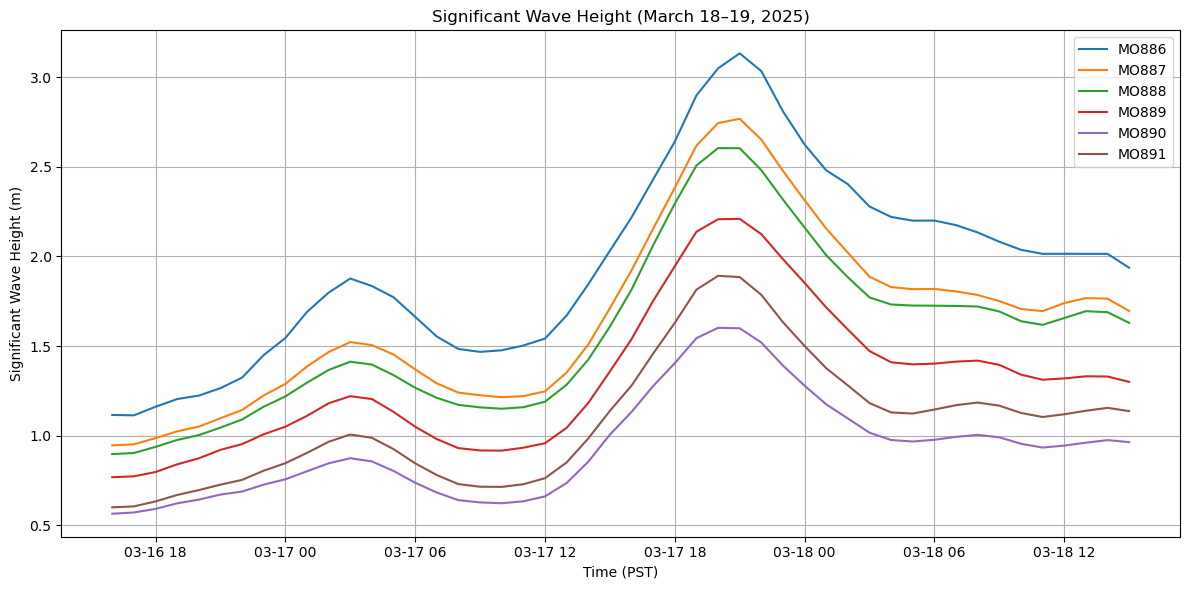

In [233]:
#visualizing how southern canyon tributaries affect wave height 
def plot_S_Hs():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']
    Sdataset = south_side()

    plt.figure(figsize=(12, 6))

    for ds, label in zip(Sdataset, locations):
        if ds is None:
            print(f"Skipping due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            time = ds['waveTime']

            # Apply time filter
            time_mask = (time >= start_date) & (time <= end_date)
            hs_filtered = hs.sel(waveTime=time_mask)
            time_filtered = time[time_mask]

            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            plt.plot(time_pst, hs_filtered, label=label)

        except Exception as e:
            print(f"Error processing ")
            continue

    plt.title("Significant Wave Height (March 18–19, 2025)")
    plt.xlabel("Time (PST)")
    plt.ylabel("Significant Wave Height (m)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_S_Hs()

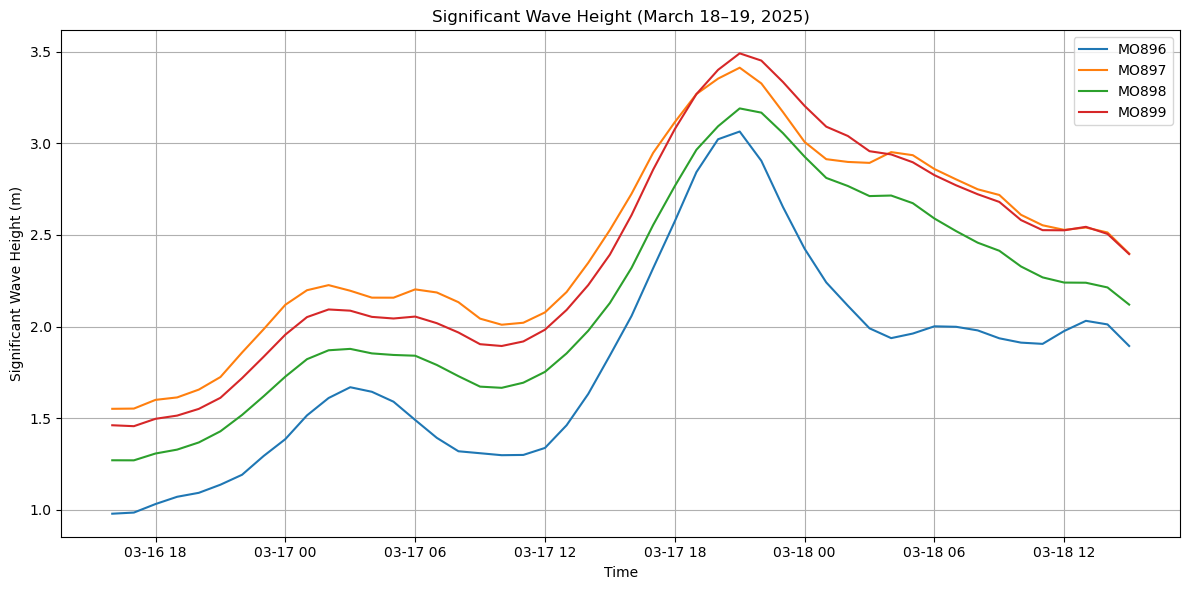

In [241]:
#visualizing how northern canyon tributaries affect wave height 
def plot_N_Hs():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO896', 'MO897', 'MO898', 'MO899']
    Ndataset = north_side()

    plt.figure(figsize=(12, 6))

    for ds, label in zip(Ndataset, locations):
        if ds is None:
            print(f"Skipping due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            time = ds['waveTime']

            # Apply time filter
            time_mask = (time >= start_date) & (time <= end_date)
            hs_filtered = hs.sel(waveTime=time_mask)
            time_filtered = time[time_mask]

            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            plt.plot(time_pst, hs_filtered, label=label)

        except Exception as e:
            print(f"Error processing")
            continue

    plt.title("Significant Wave Height (March 18–19, 2025)")
    plt.xlabel("Time")
    plt.ylabel("Significant Wave Height (m)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_N_Hs()

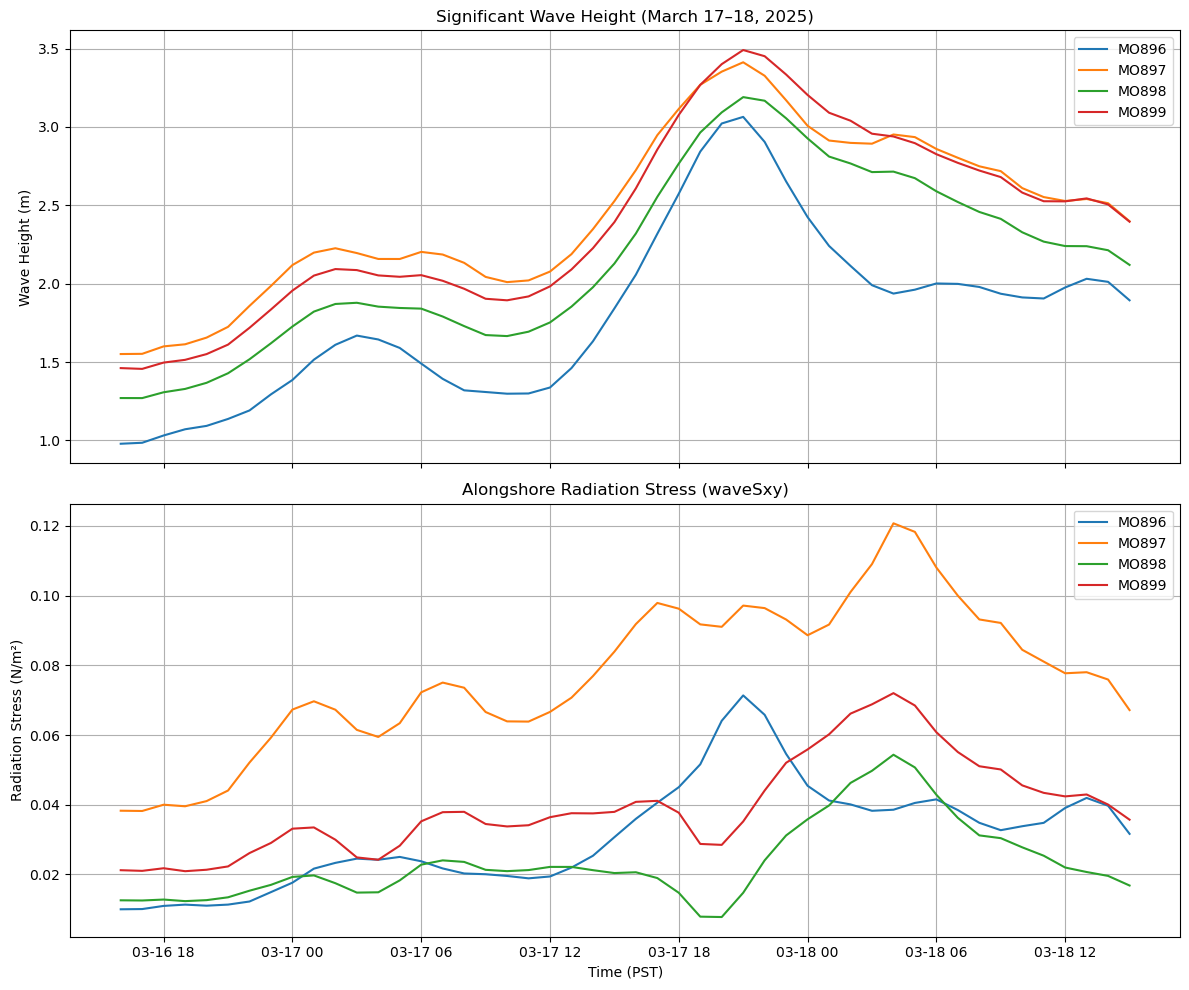

In [245]:
def plot_N_Hs_Sxy():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO896', 'MO897', 'MO898', 'MO899']
    Ndataset = north_side()
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    for ds, label in zip(Ndataset, locations):
        if ds is None:
            print(f"Skipping {label} due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            sxy = ds['waveSxy']
            time = ds['waveTime']

            # Apply time filter
            time_mask = (time >= start_date) & (time <= end_date)
            time_filtered = time[time_mask]
            hs_filtered = hs.sel(waveTime=time_mask)
            sxy_filtered = sxy.sel(waveTime=time_mask)

            # Convert time to PST
            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            # Plot wave height
            axes[0].plot(time_pst, hs_filtered, label=label)

            # Plot alongshore radiation stress
            axes[1].plot(time_pst, sxy_filtered, label=label)

        except Exception as e:
            print(f"Error processing {label}: {e}")
            continue

  
    axes[0].set_title("Significant Wave Height (March 17–18, 2025)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].set_xlabel("Time (PST)")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
plot_N_Hs_Sxy()

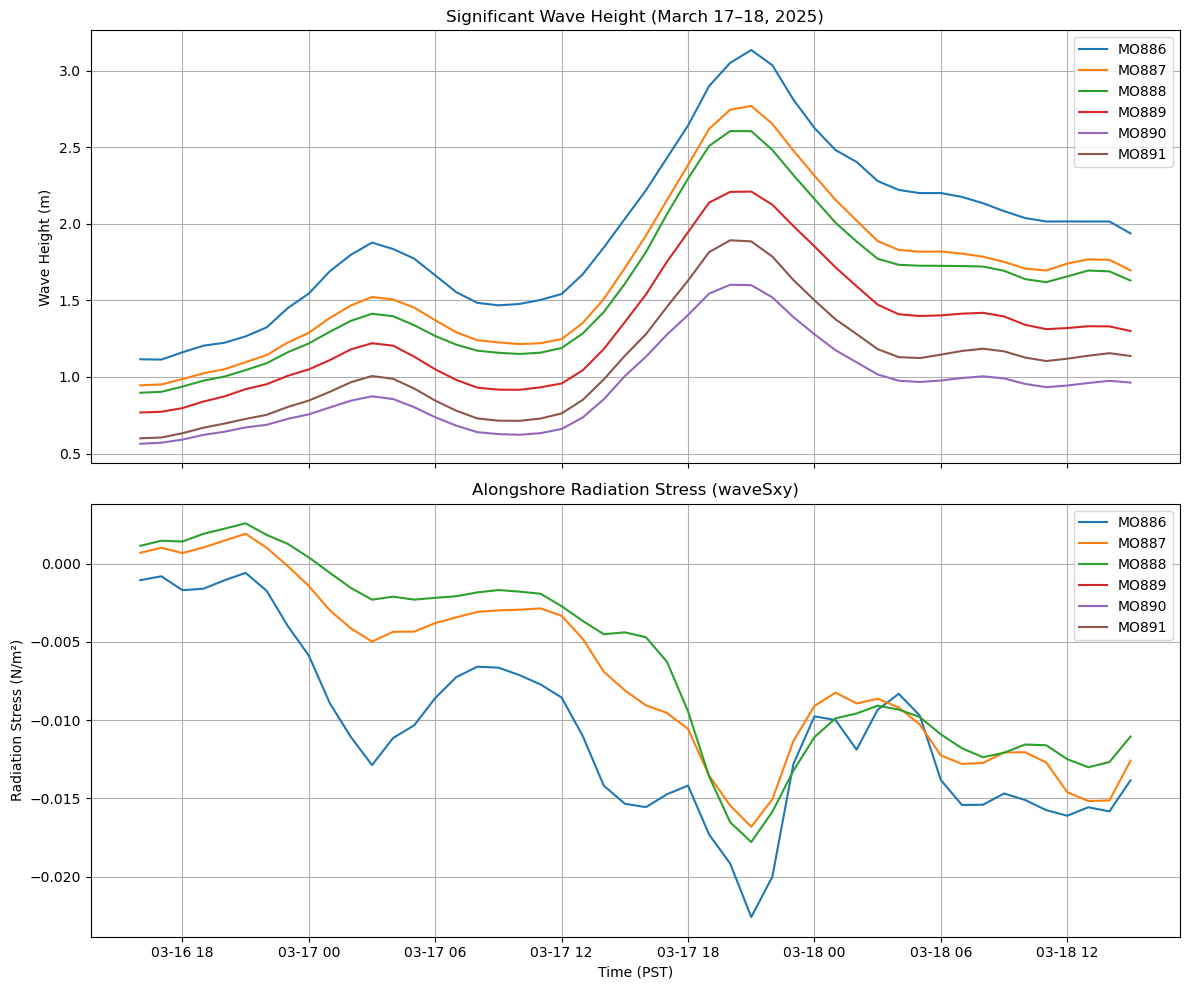

In [247]:
def plot_S_Hs_Sxy():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']
    Sdataset = south_side()

    # Set up two subplots: one for Hs and one for Sxy
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    for ds, label in zip(Sdataset, locations):
        if ds is None:
            print(f"Skipping {label} due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            sxy = ds['waveSxy']
            time = ds['waveTime']

            # Apply time mask
            time_mask = (time >= start_date) & (time <= end_date)
            hs_filtered = hs.sel(waveTime=time_mask)
            sxy_filtered = sxy.sel(waveTime=time_mask)
            time_filtered = time[time_mask]

            # Convert to PST
            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            # Plot wave height
            axes[0].plot(time_pst, hs_filtered, label=label)

            # Plot radiation stress
            axes[1].plot(time_pst, sxy_filtered, label=label)

        except Exception as e:
            print(f"Error processing {label}: {e}")
            continue

    
    axes[0].set_title("Significant Wave Height (March 17–18, 2025)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].set_xlabel("Time (PST)")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_S_Hs_Sxy()

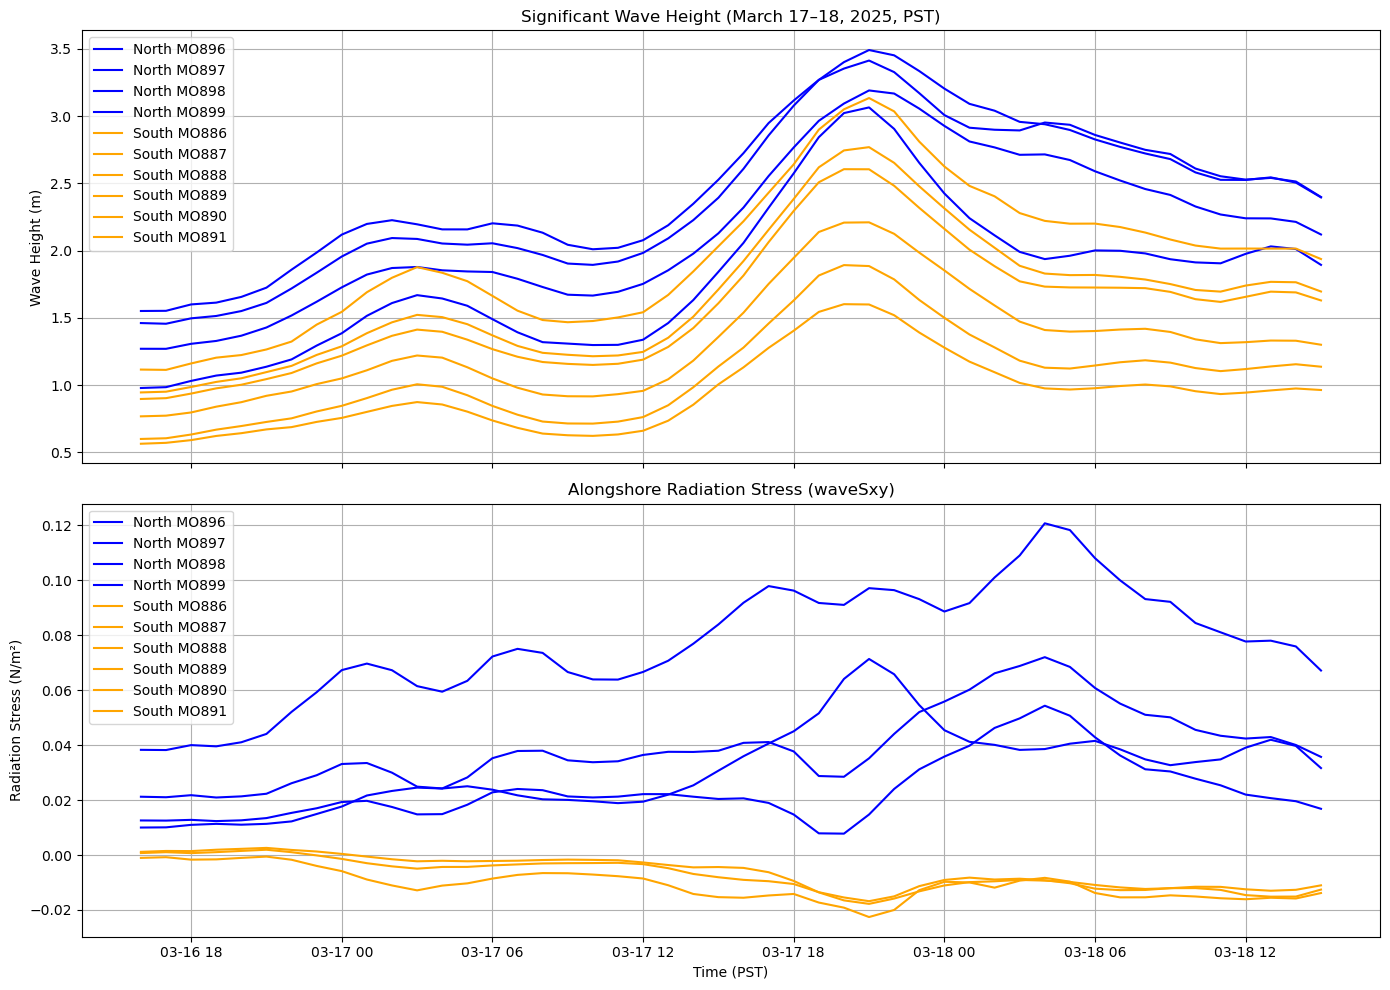

In [253]:
from itertools import cycle

def plot_all_Hs_Sxy():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    north_locs = ['MO896', 'MO897', 'MO898', 'MO899']
    south_locs = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']

    north_ds = north_side()
    south_ds = south_side()

    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    
    north_color = 'blue'
    south_color = 'orange'

    def plot_group(datasets, labels, prefix, color):
        for ds, label in zip(datasets, labels):
            if ds is None:
                print(f"Skipping {label} due to loading error.")
                continue
            try:
                hs = ds['waveHs']
                sxy = ds['waveSxy']
                time = ds['waveTime']

                # Filter time
                time_mask = (time >= start_date) & (time <= end_date)
                time_filtered = time[time_mask]
                hs_filtered = hs.sel(waveTime=time_mask)
                sxy_filtered = sxy.sel(waveTime=time_mask)

                # Convert to PST
                time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

                # Plot wave height and stress using the group color
                axes[0].plot(time_pst, hs_filtered, label=f"{prefix} {label}", color=color)
                axes[1].plot(time_pst, sxy_filtered, label=f"{prefix} {label}", color=color)

            except Exception as e:
                print(f"Error processing {label}: {e}")
                continue

    # Plot both groups with distinct colors
    plot_group(north_ds, north_locs, "North", north_color)
    plot_group(south_ds, south_locs, "South", south_color)

    
    axes[0].set_title("Significant Wave Height (March 17–18, 2025, PST)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].set_xlabel("Time (PST)")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_all_Hs_Sxy()